(a).

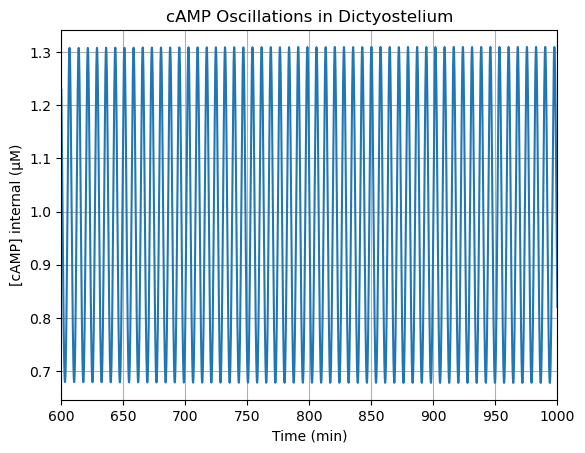

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the parameters
params = {
    'k1': 2.0, 'k2': 0.9, 'k3': 2.5, 'k4': 1.5, 'k5': 0.6,
    'k6': 0.8, 'k7': 1.0, 'k8': 1.3, 'k9': 0.3, 'k10': 0.8,
    'k11': 0.7, 'k12': 4.9, 'k13': 23.0, 'k14': 4.5
}

# Define the system of ODEs
def cAMP_system(t, y, params):
    ACA, PKA, ERK2, REG_A, cAMP_int, cAMP_ext, CAR1 = y
    dACA_dt = params['k1'] * CAR1 - params['k2'] * ACA * PKA
    dPKA_dt = params['k3'] * cAMP_int - params['k4'] * PKA
    dERK2_dt = params['k5'] * CAR1 - params['k6'] * ERK2 * PKA
    dREG_A_dt = params['k7'] - params['k8'] * REG_A * ERK2
    dcAMP_int_dt = params['k9'] * ACA - params['k10'] * REG_A * cAMP_int
    dcAMP_ext_dt = params['k11'] * ACA - params['k12'] * cAMP_ext
    dCAR1_dt = params['k13'] * cAMP_ext - params['k14'] * CAR1
    return [dACA_dt, dPKA_dt, dERK2_dt, dREG_A_dt, dcAMP_int_dt, dcAMP_ext_dt, dCAR1_dt]

# Initial conditions
initial_conditions = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# Time points for integration
time_span = (0, 1000)
time_points = np.linspace(0, 1000, 10000)

# Solve the system of ODEs
solution = solve_ivp(
    cAMP_system, time_span, initial_conditions, args=(params,),
    t_eval=time_points, method='RK45'
)

# Extract the solution
cAMP_int_solution = solution.y[4]

# Plot the results
plt.plot(solution.t, cAMP_int_solution, label='[cAMP] internal')
plt.xlabel('Time (min)')
plt.ylabel('[cAMP] internal (µM)')
plt.title('cAMP Oscillations in Dictyostelium')
# plt.legend()
plt.xlim([600, 1000])
plt.grid(True)
plt.show()

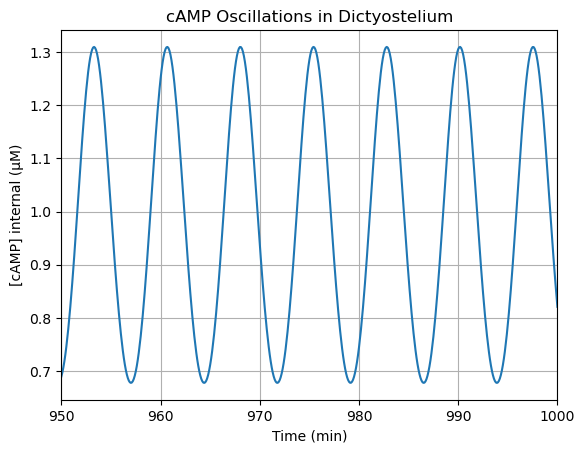

In [7]:
plt.plot(solution.t, cAMP_int_solution, label='[cAMP] internal')
plt.xlabel('Time (min)')
plt.ylabel('[cAMP] internal (µM)')
plt.title('cAMP Oscillations in Dictyostelium')
# plt.legend()
plt.xlim([950, 1000])
plt.grid(True)
plt.show()

In [44]:
period = 1/2 * (max(cAMP_int_solution) - min(cAMP_int_solution))
print(period)

0.3161633955214687


In [35]:
from scipy.signal import find_peaks

# Find the peaks in the cAMP internal solution
peaks, _ = find_peaks(cAMP_int_solution[600:])

# Calculate the period as the average difference between consecutive peaks
periods = np.diff(time_points[peaks+600])
average_period = np.mean(periods)

print(f"Average Period: {average_period}")

Average Period: 7.37317826270816


(b).

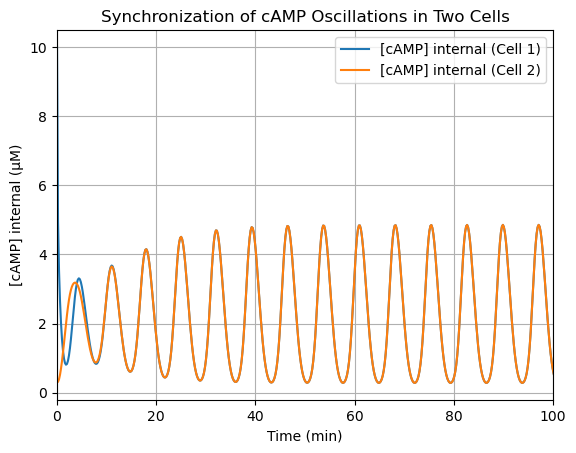

In [66]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
params = {
    'k1': 2.0, 'k2': 0.9, 'k3': 2.5, 'k4': 1.5, 'k5': 0.6,
    'k6': 0.8, 'k7': 1.0, 'k8': 1.3, 'k9': 0.3, 'k10': 0.8,
    'k11': 0.7, 'k12': 4.9, 'k13': 23.0, 'k14': 4.5
}

# Define the system of ODEs for two cells
def cAMP_system_two_cells(t, y, params):
    # Variables for cell 1
    ACA1, PKA1, ERK21, REG_A1, cAMP_int1, CAR11 = y[:6]
    # Variables for cell 2
    ACA2, PKA2, ERK22, REG_A2, cAMP_int2, CAR12 = y[6:12]
    # Shared extracellular cAMP
    cAMP_ext = y[12]

    # ODEs for cell 1
    dACA1_dt = params['k1'] * CAR11 - params['k2'] * ACA1 * PKA1
    dPKA1_dt = params['k3'] * cAMP_int1 - params['k4'] * PKA1
    dERK21_dt = params['k5'] * CAR11 - params['k6'] * ERK21 * PKA1
    dREG_A1_dt = params['k7'] - params['k8'] * REG_A1 * ERK21
    dcAMP_int1_dt = params['k9'] * ACA1 - params['k10'] * REG_A1 * cAMP_int1
    dCAR11_dt = params['k13'] * cAMP_ext - params['k14'] * CAR11

    # ODEs for cell 2
    dACA2_dt = params['k1'] * CAR12 - params['k2'] * ACA2 * PKA2
    dPKA2_dt = params['k3'] * cAMP_int2 - params['k4'] * PKA2
    dERK22_dt = params['k5'] * CAR12 - params['k6'] * ERK22 * PKA2
    dREG_A2_dt = params['k7'] - params['k8'] * REG_A2 * ERK22
    dcAMP_int2_dt = params['k9'] * ACA2 - params['k10'] * REG_A2 * cAMP_int2
    dCAR12_dt = params['k13'] * cAMP_ext - params['k14'] * CAR12

    # ODE for shared extracellular cAMP
    dcAMP_ext_dt = params['k11'] * (ACA1 + ACA2) - params['k12'] * cAMP_ext

    return [dACA1_dt, dPKA1_dt, dERK21_dt, dREG_A1_dt, dcAMP_int1_dt, dCAR11_dt,
            dACA2_dt, dPKA2_dt, dERK22_dt, dREG_A2_dt, dcAMP_int2_dt, dCAR12_dt,
            dcAMP_ext_dt]

# Initial conditions: different initial phases for each cell
initial_conditions = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0,   # Cell 1
                      0.3, 0.3, 0.3, 0.3, 0.3, 0.3,   # Cell 2
                      1]                            # Shared extracellular cAMP

# Time points for integration
time_span = (0, 200)
time_points = np.linspace(0, 200, 1000)

# Solve the system of ODEs
solution = solve_ivp(
    cAMP_system_two_cells, time_span, initial_conditions, args=(params,),
    t_eval=time_points, method='RK45'
)

# Extract solutions
cAMP_int1_solution = solution.y[4]
cAMP_int2_solution = solution.y[10]

# Plot the results
plt.plot(solution.t, cAMP_int1_solution, label='[cAMP] internal (Cell 1)')
plt.plot(solution.t, cAMP_int2_solution, label='[cAMP] internal (Cell 2)')
plt.xlabel('Time (min)')
plt.ylabel('[cAMP] internal (µM)')
plt.title('Synchronization of cAMP Oscillations in Two Cells')
plt.legend()
plt.grid(True)
plt.xlim([0, 100])
plt.show()